In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('q2_dataset.csv', header = None)
data.head()

,0,1,2,3,4,5
0,Date,Close/Last,Volume,Open,High,Low
1,07/08/20,$381.37,29272970,376.72,381.50,376.36
2,07/07/20,$372.69,28106110,375.41,378.62,372.23
3,07/06/20,$373.85,29663910,370.00,375.78,369.87
4,07/02/20,$364.11,28510370,367.85,370.47,363.64


In [3]:
# # Create the dataset by using the latest 3 days as the features 
# # and the next day’s opening price as the target.
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split

# # Load the dataset
# data = pd.read_csv('q2_dataset.csv')

# # Extract values
# values = data.values

# # Initialize lists for targets and features
# targets = []
# features = []
# days = 3

# # Iterate over the dataset to create features and targets
# for i in range(len(values) - days):
#     targets.append(float(str(values[i][1]).replace('$', '')))  # Convert the target value to a float
#     feature = []
#     for j in range(2, 6):
#         for k in range(0, days):
#             feature.append(float(str(values[i + k + 1][j]).replace('$', '')))  # Convert feature values to floats
#     features.append(feature)

# # Create DataFrame from features and targets
# dataset = pd.DataFrame(features)
# dataset['Target'] = targets

# # Split the dataset into training and testing sets
# train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=42)

# # Save the training and testing datasets to CSV files
# train_data.to_csv('data/train_data_RNN.csv', index=False, header=False)
# test_data.to_csv('data/test_data_RNN.csv', index=False, header=False)

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


# 1. Loading training data
train_data = pd.read_csv('./data/train_data_RNN.csv')
test_data = pd.read_csv('./data/test_data_RNN.csv')

# Extracting the features and target variables from the training data
train_features = train_data.iloc[:, :-1].values
train_target = train_data.iloc[:, -1].values

# Extracting the features and target variables from the testing data
test_features = test_data.iloc[:, :-1].values
test_target = test_data.iloc[:, -1].values

# Performing feature scaling for training and testing data
scaler = MinMaxScaler()
scaled_train_features = scaler.fit_transform(train_features)
scaled_train_target = scaler.fit_transform(train_target.reshape(-1, 1))
scaled_test_features = scaler.fit_transform(test_features)
scaled_test_target = scaler.fit_transform(test_target.reshape(-1, 1))

# Reshaping the features for LSTM input [samples, time steps, features]
reshaped_train_features = np.reshape(scaled_train_features, (scaled_train_features.shape[0], 1, scaled_train_features.shape[1]))
reshaped_test_features = np.reshape(scaled_test_features, (scaled_test_features.shape[0], 1, scaled_test_features.shape[1]))

2023-07-22 21:40:17.642423: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:

    # 2. Train network
    # Create the RNN model
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(1, train_features.shape[1])))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(reshaped_train_features, scaled_train_target, epochs=100, batch_size=32, validation_data=(reshaped_test_features, scaled_test_target))


    # Define the model checkpoint callback to save the best model during training
    checkpoint_callback = ModelCheckpoint(filepath='models/20941704.h5', save_best_only=True, save_weights_only=False)

    # Train the model on the training data
    train_history = model.fit(reshaped_train_features, scaled_train_target, epochs=100, batch_size=32, callbacks=[checkpoint_callback])

    # Print the final training loss
    final_train_loss = train_history.history['loss'][-1]
    print(f"Final Training Loss: {final_train_loss}")

Epoch 1/100
28/28 [==============================] - 2s 14ms/step - loss: 0.0815 - val_loss: 0.0296
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0101 - val_loss: 0.0044
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 8.6865e-04
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 5.9111e-04 - val_loss: 7.5344e-04
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 4.8923e-04 - val_loss: 5.6700e-04
Epoch 7/100
28/28 [==============================] - 0s 5ms/step - loss: 4.2961e-04 - val_loss: 5.5073e-04
Epoch 8/100
28/28 [==============================] - 0s 5ms/step - loss: 3.9317e-04 - val_loss: 5.1024e-04
Epoch 9/100
28/28 [==============================] - 0s 5ms/step - loss: 3.7607e-04 - val_loss: 5.0665e-04
Epoch 10/100
28/28 [==============================] - 0s 5ms/ste

28/28 [==============================] - 0s 5ms/step - loss: 2.1582e-04 - val_loss: 3.4864e-04
Epoch 78/100
28/28 [==============================] - 0s 5ms/step - loss: 2.1750e-04 - val_loss: 2.8245e-04
Epoch 79/100
28/28 [==============================] - 0s 6ms/step - loss: 2.2319e-04 - val_loss: 4.4806e-04
Epoch 80/100
28/28 [==============================] - 0s 5ms/step - loss: 2.1261e-04 - val_loss: 2.6505e-04
Epoch 81/100
28/28 [==============================] - 0s 5ms/step - loss: 2.2335e-04 - val_loss: 4.0244e-04
Epoch 82/100
28/28 [==============================] - 0s 4ms/step - loss: 2.2225e-04 - val_loss: 3.2895e-04
Epoch 83/100
28/28 [==============================] - 0s 5ms/step - loss: 2.1512e-04 - val_loss: 2.7085e-04
Epoch 84/100
28/28 [==============================] - 0s 4ms/step - loss: 2.2586e-04 - val_loss: 3.0134e-04
Epoch 85/100
28/28 [==============================] - 0s 5ms/step - loss: 2.2067e-04 - val_loss: 2.4004e-04
Epoch 86/100
28/28 [=====================

28/28 [==============================] - 0s 4ms/step - loss: 1.9619e-04
Epoch 26/100
28/28 [==============================] - 0s 4ms/step - loss: 1.9686e-04
Epoch 27/100
28/28 [==============================] - 0s 3ms/step - loss: 2.0009e-04
Epoch 28/100
28/28 [==============================] - 0s 3ms/step - loss: 2.0455e-04
Epoch 29/100
28/28 [==============================] - 0s 3ms/step - loss: 1.9726e-04
Epoch 30/100
28/28 [==============================] - 0s 3ms/step - loss: 1.9904e-04
Epoch 31/100
28/28 [==============================] - 0s 3ms/step - loss: 1.9574e-04
Epoch 32/100
28/28 [==============================] - 0s 3ms/step - loss: 2.0957e-04
Epoch 33/100
28/28 [==============================] - 0s 3ms/step - loss: 2.1339e-04
Epoch 34/100
28/28 [==============================] - 0s 3ms/step - loss: 2.1334e-04
Epoch 35/100
28/28 [==============================] - 0s 3ms/step - loss: 2.1127e-04
Epoch 36/100
28/28 [==============================] - 0s 3ms/step - loss: 2.09

28/28 [==============================] - 0s 4ms/step - loss: 2.1797e-04
Epoch 61/100
28/28 [==============================] - 0s 3ms/step - loss: 2.0787e-04
Epoch 62/100
28/28 [==============================] - 0s 3ms/step - loss: 2.1628e-04
Epoch 63/100
28/28 [==============================] - 0s 3ms/step - loss: 2.1630e-04
Epoch 64/100
28/28 [==============================] - 0s 3ms/step - loss: 2.0230e-04
Epoch 65/100
28/28 [==============================] - 0s 4ms/step - loss: 2.0283e-04
Epoch 66/100
28/28 [==============================] - 0s 3ms/step - loss: 1.9685e-04
Epoch 67/100
28/28 [==============================] - 0s 3ms/step - loss: 2.0340e-04
Epoch 68/100
28/28 [==============================] - 0s 4ms/step - loss: 1.9323e-04
Epoch 69/100
28/28 [==============================] - 0s 4ms/step - loss: 2.0012e-04
Epoch 70/100
28/28 [==============================] - 0s 4ms/step - loss: 1.9956e-04
Epoch 71/100
28/28 [==============================] - 0s 4ms/step - loss: 2.03

28/28 [==============================] - 0s 4ms/step - loss: 1.9428e-04
Epoch 97/100
28/28 [==============================] - 0s 3ms/step - loss: 1.8935e-04
Epoch 98/100
28/28 [==============================] - 0s 3ms/step - loss: 2.0985e-04
Epoch 99/100
28/28 [==============================] - 0s 3ms/step - loss: 1.9080e-04
Epoch 100/100
28/28 [==============================] - 0s 3ms/step - loss: 1.9373e-04
Final Training Loss: 0.0001937259512487799


In [6]:
# 3. Saving the trained model for training data
model.save('models/20941704_train.h5')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


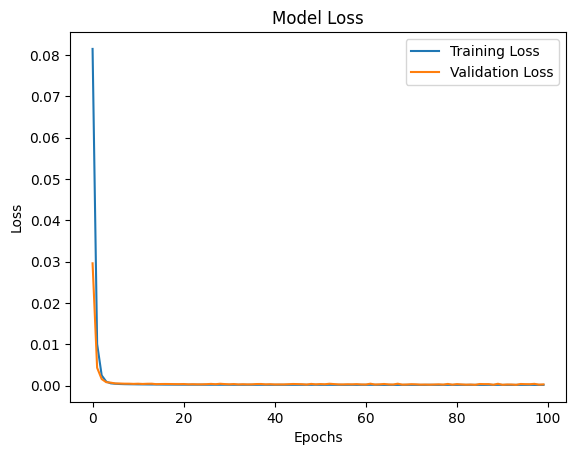

In [7]:
# 4. Plotting the loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()